# Лабораторная работа №6

Барышев Михаил ИУ10-56, Вариант - 5

## Цель работы

изучение принципов построения модели линейной одномерной регрессии.

## Задачи
 - реализовать каонвейер для выполнения всех стадий обработки данных при решении задачи одномерной регрессии;
 - получение теоретических представлений о задаче регресии;
 - получение навыков использования пайплайна при решении задачи машинного обучения;
 - получение навыков рефакторинга кода в задачах машинного обучения.
 
## База данных
 - Additional Information

    The energy dispersive X-ray fluorescence (EDXRF) was used to determine the chemical composition of celadon body and glaze in Longquan kiln (at Dayao County) and Jingdezhen kiln. Forty typical shards in four cultural eras were selected to investigate the raw materials and firing technology. We hope to identify chemical elements that are strongest explanatory variables to classify samples into different cultural eras and kilns.
 - Ceramic.Name: name of ceramic types from Longquan and Jindgezhen
 - Part: a binary categorical variable ('Body' or 'Glaze')
 - Na2O: percentage of Na2O (wt%)
 - MgO: percentage of MgO (wt%)
 - Al2O3: percentage of AI2O3 (wt%)
 - SiO2: percentage of SiO2 (wt%)
 - K2O: percentage of K2O (wt%)
 - CaO: percentage of CaO (wt%)
 - TiO2: percentage of TiO2 (wt%)
 - Fe2O3: percentage of Fe2O3 (wt%)
 - MnO: percentage of MnO (ppm)
 - CuO: percentage of CuO (ppm)
 - ZnO: percentage of ZnO (ppm)
 - PbO2: percentage of PbO2 (ppm)
 - Rb2O: percentage of Rb2O (ppm)
 - SrO: percentage of SrO (ppm)
 - Y2O3: percentage of Y2O3 (ppm)
 - ZrO2: percentage of ZrO2 (ppm)
 - P2O5: percentage of P2O5 (ppm)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('./Chemical Composion of Ceramic.csv')
dataset.head()

,Ceramic Name,Part,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,FLQ-1-b,Body,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
1,FLQ-2-b,Body,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110
2,FLQ-3-b,Body,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200
3,FLQ-4-b,Body,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210
4,FLQ-5-b,Body,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150


In [19]:
X = dataset.iloc[:, 2:3].values
y = dataset.iloc[:, 3].values
print ("Матрица признаков"); print(X[:5])
print ("Зависимая переменная"); print(y[:5])

Матрица признаков
[[0.62]
 [0.57]
 [0.49]
 [0.89]
 [0.03]]
Зависимая переменная
[0.38 0.47 0.19 0.3  0.36]


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0) 

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

[0.44187118 0.49919594 0.41196261 0.42317833 0.41694738 0.46430261
 0.32099071 0.46430261 0.42068595 0.48548785 0.42940928 0.46056404
 0.39576214 0.47177975 0.45059452 0.44934833 0.46679499 0.34466833
 0.37831547 0.48548785 0.46679499 0.44685595]


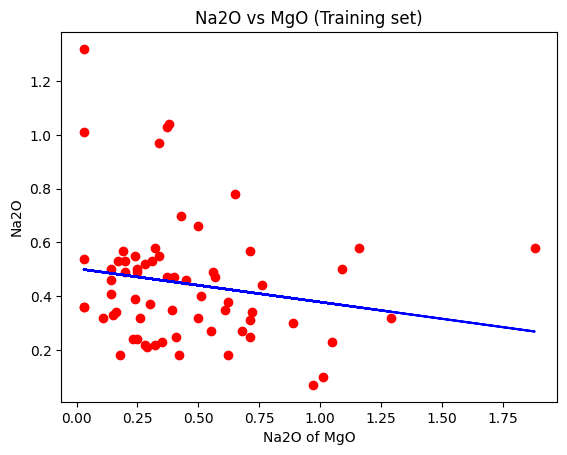

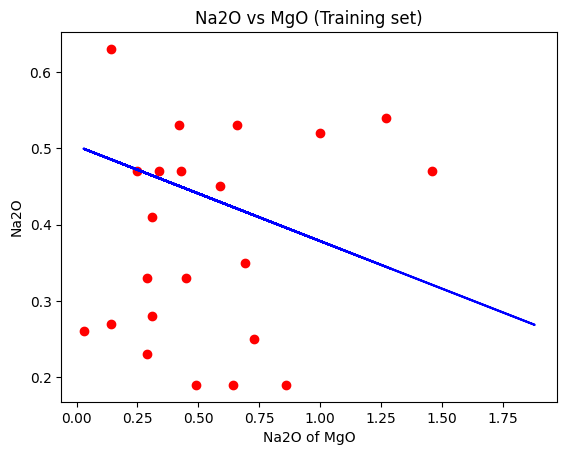

In [27]:
y_pred = regressor.predict(X_test)
print(y_pred)

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Na2O vs MgO (Training set)')
plt.xlabel('Na2O of MgO')
plt.ylabel('Na2O')
plt.show()

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Na2O vs MgO (Training set)')
plt.xlabel('Na2O of MgO')
plt.ylabel('Na2O')
plt.show()

In [31]:
Na2O = [[0.49]]

regressor.predict(Na2O)

array([0.44187118])

In [33]:
Na2O = 0.49

a = regressor.coef_
b = regressor.intercept_

Salary  = a * Na2O + b 
Salary

array([0.44187118])